In [3]:
from google.colab import drive
drive.mount('/content/drive') #note - you must add the shared ENG 4000 folder as a shortcut to your google drive in the /content/drive/MyDrive/ path

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.gofplots import qqplot
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras import layers, optimizers, regularizers
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.metrics import Precision, Recall
import numpy as np

In [ ]:
#Import libraries needed for EDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD

#Import labels (these will the target variables we will use to predict)
labels = pd.read_csv("/content/drive/MyDrive/ENG 4000/labels.csv") 
labels.head()

,Sample ID,Pollen
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
#Import features (these will the be data we use to predict the labels)
lifetime = pd.read_csv("/content/drive/MyDrive/ENG 4000/lifetime.csv")
lifetime.head() #Head allows us to show the first 4 rows of the data

,Sample ID,"350-400 nm, t=0","350-400 nm, t=1","350-400 nm, t=2","350-400 nm, t=3","350-400 nm, t=4","350-400 nm, t=5","350-400 nm, t=6","350-400 nm, t=7","350-400 nm, t=8",...,"672-800 nm, t=14","672-800 nm, t=15","672-800 nm, t=16","672-800 nm, t=17","672-800 nm, t=18","672-800 nm, t=19","672-800 nm, t=20","672-800 nm, t=21","672-800 nm, t=22","672-800 nm, t=23"
0,0,-0.010454,0.000201,0.010856,0.114194,0.217531,0.166868,0.116204,0.109168,0.102131,...,-0.015480,-0.016084,-0.017089,-0.014877,-0.013068,-0.003418,0.006031,0.011460,0.016888,0.013872
1,1,0.119942,0.184249,0.248555,0.236994,0.225434,0.098988,-0.028179,-0.054191,-0.081647,...,0.013006,0.028179,0.043353,0.057081,0.070809,0.057081,0.043353,0.013728,-0.016618,-0.026012
2,2,-0.016149,0.063383,0.142915,0.286637,0.430359,0.262414,0.094469,0.082761,0.071054,...,0.024223,0.023819,0.023415,0.014534,0.005248,-0.009285,-0.024627,-0.027049,-0.030279,-0.015745
3,3,0.067116,0.198401,0.329687,0.366400,0.403114,0.235325,0.067536,0.063644,0.059752,...,-0.008100,-0.006627,-0.005365,-0.001999,0.001262,0.003787,0.006312,0.007469,0.008626,0.004103
4,4,-0.043760,0.090762,0.225284,0.214749,0.204214,0.213128,0.222042,0.133712,0.044571,...,-0.059157,-0.068882,-0.080227,-0.052674,-0.026742,-0.004052,0.017828,0.031605,0.045381,0.020259


In [ ]:
spectrum = pd.read_csv("/content/drive/MyDrive/ENG 4000/spectrum.csv")
spectrum.head()

,Sample ID,"350 nm, t=0","364 nm, t=0","379 nm, t=0","393 nm, t=0","408 nm, t=0","422 nm, t=0","437 nm, t=0","451 nm, t=0","466 nm, t=0",...,"669 nm, t=3","683 nm, t=3","698 nm, t=3","712 nm, t=3","727 nm, t=3","741 nm, t=3","756 nm, t=3","770 nm, t=3","785 nm, t=3","800 nm, t=3"
0,0,0.129278,0.041910,0.121054,0.496012,0.800121,1.000000,0.853183,0.962091,0.745947,...,0.000000,0.000000,0.0,0.000144,-0.000576,-0.000790,-0.000681,-0.000004,-0.000105,-1.480000e-19
1,1,-0.011963,0.086481,0.099374,0.132618,0.527263,0.820056,0.939995,1.000000,0.914903,...,0.000000,0.000000,0.0,0.000286,-0.001143,-0.001451,-0.001815,-0.000667,-0.000672,-9.580000e-19
2,2,-0.006165,0.110295,0.157199,0.232229,0.404684,0.739406,1.000000,0.887348,0.716564,...,0.000000,0.000000,0.0,0.000000,0.000000,-0.000157,0.000630,0.000892,0.000630,-3.147950e-04
3,3,-0.005657,0.036070,0.101411,0.245322,0.426752,0.674580,0.992005,1.000000,0.851382,...,-0.000191,0.000048,0.0,0.000000,0.000000,0.000000,-0.000130,0.000519,0.000606,1.038110e-03
4,4,-0.007325,0.063621,0.125746,0.214150,0.409600,0.782647,1.000000,0.770002,0.544802,...,0.001524,-0.000381,0.0,0.000466,-0.001863,-0.001919,-0.004657,-0.003952,-0.003444,-4.060000e-18


In [ ]:
scattering = pd.read_csv("/content/drive/MyDrive/ENG 4000/scattering.csv")
scattering.head()

,Sample ID,"angle=-37.5, t=0","angle=-37.5, t=1","angle=-37.5, t=2","angle=-37.5, t=3","angle=-37.5, t=4","angle=-37.5, t=5","angle=-37.5, t=6","angle=-37.5, t=7","angle=-37.5, t=8",...,"angle=37.5, t=110","angle=37.5, t=111","angle=37.5, t=112","angle=37.5, t=113","angle=37.5, t=114","angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119"
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,982.383616,1002.18053,1034.797552,892.183468,840.017425,739.383196,740.476799,600.65502,695.104062,873.792882
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [ ]:
size = pd.read_csv("/content/drive/MyDrive/ENG 4000/size.csv")
size.head()

,Unnamed: 0,size
0,0,12.513989
1,1,19.461646
2,2,25.726931
3,3,35.178985
4,4,4.672308


In [ ]:
lifetime_features = pd.read_csv("/content/drive/MyDrive/ENG 4000/lifetime_features.csv")
lifetime_features.head()

,Unnamed: 0,lt feature 1,lt feature 2,lt feature 3,lt feature 4
0,0,0.280202,1.0,0.134079,-0.008439
1,1,0.481173,1.0,0.266975,0.140432
2,2,0.519641,1.0,0.145762,0.002905
3,3,0.639556,1.0,0.305319,-0.015814
4,4,0.624575,1.0,0.396259,-0.059949


# Checking for duplicates and nulls

In [ ]:
# data = {'lifetime':lifetime,
#         'spectrum':spectrum,
#         'scattering':scattering,
#         'size':size,
#         'lifetime_features':lifetime_features}
data = {'scattering':scattering}
pd.set_option('display.max_rows',None)
for x in data:
  print(x)
  print(f'Nulls: {(data[x][data[x].isna().any(axis=1)].sum() > 0).sum()}')
  print(f'Duplicates: {data[x].duplicated().sum()}\n')

  #No null features so we will not need to adjust our dataset

scattering
Nulls: 0
Duplicates: 0



# Check labels for nulls and duplicates

In [ ]:
labels.info() #Check the data types and how many nulls in the labels table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866 entries, 0 to 9865
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sample ID  9866 non-null   int64
 1   Pollen     9866 non-null   int64
dtypes: int64(2)
memory usage: 154.3 KB


In [ ]:
labels['Pollen'].unique() #There are 12 unique values for pollen, which correlates to 12 different types of pollen

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

# Combine features into one dataframe

In [ ]:
#Courtesy of Randy
features = pd.DataFrame()

for x in data:
  features = pd.concat([features,data[x].iloc[: , 1:]], axis=1)

features.head()

#Thanks Randy!!

,"angle=-37.5, t=0","angle=-37.5, t=1","angle=-37.5, t=2","angle=-37.5, t=3","angle=-37.5, t=4","angle=-37.5, t=5","angle=-37.5, t=6","angle=-37.5, t=7","angle=-37.5, t=8","angle=-37.5, t=9",...,"angle=37.5, t=110","angle=37.5, t=111","angle=37.5, t=112","angle=37.5, t=113","angle=37.5, t=114","angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,982.383616,1002.18053,1034.797552,892.183468,840.017425,739.383196,740.476799,600.65502,695.104062,873.792882
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [ ]:
# features.to_csv('/content/drive/MyDrive/ENG 4000/features.csv')

In [ ]:
features.shape

(9866, 2400)

In [ ]:
features.info() #Check for nulls, appears to be all floating point entries for data about the pollen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866 entries, 0 to 9865
Columns: 2400 entries, angle=-37.5, t=0 to angle=37.5, t=119
dtypes: float64(2400)
memory usage: 180.7 MB


In [ ]:
features.describe() #We can further verify in describe()

,"350-400 nm, t=0","350-400 nm, t=1","350-400 nm, t=2","350-400 nm, t=3","350-400 nm, t=4","350-400 nm, t=5","350-400 nm, t=6","350-400 nm, t=7","350-400 nm, t=8","350-400 nm, t=9",...,"angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119",size,lt feature 1,lt feature 2,lt feature 3,lt feature 4
count,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,...,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000,9866.000000
mean,0.054501,0.129879,0.207672,0.278997,0.357199,0.278295,0.199518,0.146643,0.094979,0.066842,...,14.088371,12.621426,11.445568,10.200185,10.393801,26.204309,0.729342,0.919023,0.402750,0.005201
std,0.112790,0.111535,0.151223,0.115425,0.141304,0.117297,0.128957,0.110486,0.112885,0.092936,...,167.409003,158.018837,149.590872,140.410387,144.395803,10.220080,0.253455,0.172159,0.270874,0.169294
min,-0.325911,-0.261134,-0.290650,-0.171657,-0.246316,-0.161798,-0.309446,-0.424242,-0.567100,-0.450216,...,-173.999937,-193.665145,-219.937796,-186.138296,-221.157807,3.582779,-4.160000,-2.641791,-6.440000,-6.840000
25%,0.000000,0.056260,0.088899,0.208653,0.271081,0.199449,0.110214,0.071947,0.028002,0.013775,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.772832,0.546894,0.926986,0.229302,-0.015708
50%,0.020483,0.113195,0.188349,0.277258,0.361482,0.275712,0.182363,0.129294,0.075682,0.053462,...,0.000000,0.000000,0.000000,0.000000,0.000000,26.966954,0.761776,1.000000,0.360906,0.002202
75%,0.067851,0.182943,0.308304,0.350088,0.435018,0.349174,0.275445,0.204631,0.140749,0.102684,...,0.000000,0.000000,0.000000,0.000000,0.000000,33.312604,1.000000,1.000000,0.545189,0.023612
max,0.979619,0.765217,1.009491,0.874499,1.249406,0.945368,0.851730,0.875536,1.206009,1.042918,...,5116.110912,4788.091254,4838.284826,5009.191806,5084.968633,82.466110,1.000000,1.000000,1.000000,1.000000


# Combine Features and Labels into 'results' table

In [ ]:
results = pd.concat([labels, features],axis=1)
results.head(25)

,Sample ID,Pollen,"angle=-37.5, t=0","angle=-37.5, t=1","angle=-37.5, t=2","angle=-37.5, t=3","angle=-37.5, t=4","angle=-37.5, t=5","angle=-37.5, t=6","angle=-37.5, t=7",...,"angle=37.5, t=110","angle=37.5, t=111","angle=37.5, t=112","angle=37.5, t=113","angle=37.5, t=114","angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119"
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,982.383616,1002.18053,1034.797552,892.183468,840.017425,739.383196,740.476799,600.65502,695.104062,873.792882
4,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [ ]:
#From inspection of the csv data, it appears that pollenID is a number used to identify a specific column of data
#We can drop this column as it has no significance to our data analysis
results.drop(['Sample ID'], axis=1, inplace=True)
results.head(25)

,Pollen,"angle=-37.5, t=0","angle=-37.5, t=1","angle=-37.5, t=2","angle=-37.5, t=3","angle=-37.5, t=4","angle=-37.5, t=5","angle=-37.5, t=6","angle=-37.5, t=7","angle=-37.5, t=8",...,"angle=37.5, t=110","angle=37.5, t=111","angle=37.5, t=112","angle=37.5, t=113","angle=37.5, t=114","angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119"
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,982.383616,1002.18053,1034.797552,892.183468,840.017425,739.383196,740.476799,600.65502,695.104062,873.792882
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


# Start EDA on the full combined dataset

In [ ]:
results.groupby('Pollen').mean()

,"angle=-37.5, t=0","angle=-37.5, t=1","angle=-37.5, t=2","angle=-37.5, t=3","angle=-37.5, t=4","angle=-37.5, t=5","angle=-37.5, t=6","angle=-37.5, t=7","angle=-37.5, t=8","angle=-37.5, t=9",...,"angle=37.5, t=110","angle=37.5, t=111","angle=37.5, t=112","angle=37.5, t=113","angle=37.5, t=114","angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119"
Pollen,,,,,,,,,,,,,,,,,,,,,
0,20.058558,23.049801,25.226794,27.616941,30.884722,34.027021,35.960643,35.538963,36.069246,36.566284,...,40.645168,37.326735,30.333947,26.603616,26.507381,24.635581,22.722279,21.421931,21.429997,21.898276
1,46.631700,51.598889,51.770044,50.889415,51.960678,54.518280,58.910567,62.440025,64.601549,66.654616,...,28.648637,27.096097,25.621588,26.394441,25.402596,20.475165,18.102172,16.426337,15.502402,15.166264
2,62.711473,69.569170,76.266147,83.132946,86.928471,91.517521,95.546373,101.115110,107.321018,114.345888,...,59.731172,51.978545,44.857232,39.878615,35.172966,31.225781,26.530155,24.119289,21.597056,23.858187
3,13.076063,14.437177,16.300298,18.619611,20.338286,21.360205,22.596637,23.385431,26.030991,30.878514,...,23.296368,19.790688,16.969615,15.346194,13.433146,11.040416,9.571376,10.017218,9.289107,9.929127
4,13.201945,13.428246,13.604679,15.768194,17.876588,19.033066,18.738288,19.226448,19.895542,21.566283,...,17.948968,14.508279,12.434411,11.103890,11.698430,11.753044,10.063810,7.194079,4.522872,4.297533
5,27.817227,32.357996,35.981365,38.635182,40.646605,43.636850,46.799428,48.394817,52.010725,58.934004,...,21.643261,15.785937,12.382862,10.190883,9.434162,7.112177,6.226718,5.742593,5.429945,4.916054
6,26.540727,30.384470,33.298036,35.033107,41.095091,50.312066,58.476466,63.177021,68.226941,72.909210,...,47.528889,38.242619,32.585366,28.212887,26.828880,24.950251,23.479846,18.255061,12.532719,11.038118
7,3.722080,4.371511,4.837105,5.601444,6.034436,6.343200,6.486384,7.271643,7.965750,8.764883,...,3.811687,3.572507,2.934391,2.634293,2.618489,2.522116,2.394454,2.324540,2.323709,2.311288
8,6.436482,6.802843,7.067455,7.545606,7.976208,8.079208,8.185177,8.595497,9.139864,10.580851,...,9.759522,11.162924,7.598308,2.718346,0.093232,0.289914,0.146456,0.106316,0.138197,0.358075


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


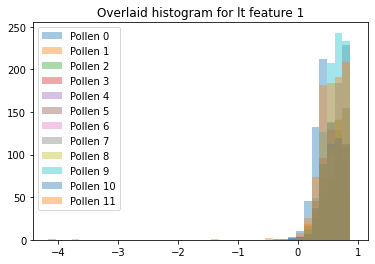

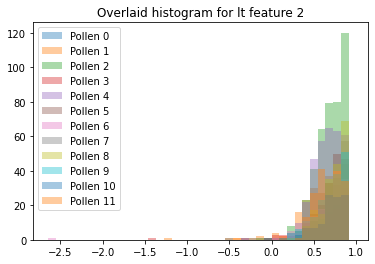

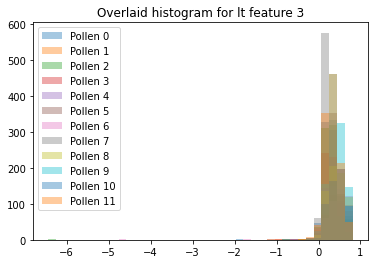

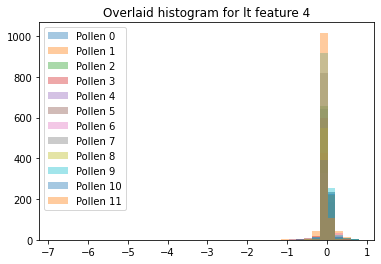

In [ ]:
#We can get a visual representation below
for i in ['lt feature 1', 'lt feature 2', 'lt feature 3', 'lt feature 4']: #For every feature
    p0 = list(results[results['Pollen'] == 0][i].dropna())
    p1 = list(results[results['Pollen'] == 1][i].dropna())
    p2 = list(results[results['Pollen'] == 2][i].dropna())
    p3 = list(results[results['Pollen'] == 3][i].dropna())
    p4 = list(results[results['Pollen'] == 4][i].dropna())
    p5 = list(results[results['Pollen'] == 5][i].dropna())
    p6 = list(results[results['Pollen'] == 6][i].dropna())
    p7 = list(results[results['Pollen'] == 7][i].dropna())
    p8 = list(results[results['Pollen'] == 8][i].dropna())
    p9 = list(results[results['Pollen'] == 9][i].dropna())
    p10 = list(results[results['Pollen'] == 10][i].dropna())
    p11 = list(results[results['Pollen'] == 11][i].dropna())
    xmin = min(min(p0), min(p1), min(p2), min(p3), min(p4), min(p5), min(p6), min(p7), min(p8), min(p9), min(p10), min(p11)) #Dimensions of the plot
    xmax = max(max(p0), max(p1), max(p2), max(p3), max(p4), max(p5), max(p6), max(p7), max(p8), max(p9), max(p10), max(p11))
    width = (xmax - xmin) / 40
    #Draw the plots, arranging adelie as red, gentoo as green, chinstrap as blue
    sns.distplot(p0, kde=False, bins=np.arange(xmin, xmax, width)) 
    sns.distplot(p1, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p2, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p3, kde=False, bins=np.arange(xmin, xmax, width)) 
    sns.distplot(p4, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p5, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p6, kde=False, bins=np.arange(xmin, xmax, width)) 
    sns.distplot(p7, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p8, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p9, kde=False, bins=np.arange(xmin, xmax, width)) 
    sns.distplot(p10, kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(p11, kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Pollen 0', 'Pollen 1', 'Pollen 2', 'Pollen 3', 'Pollen 4', 'Pollen 5', 'Pollen 6', 'Pollen 7', 'Pollen 8', 'Pollen 9', 'Pollen 10', 'Pollen 11' ]) #Legends for plot
    plt.title('Overlaid histogram for {}'.format(i)) #Title
    plt.show()

Notes: There is too much different pollen types and features to plot and effectively plot and make sense of it. Might need to tweak plotting parameters? And plot by different categories of data? I.e., EDA lifetime, size, scattering, seperately and then consolidate their EDA later

# Outlier Detection and normalization


In [ ]:
# def detect_outlier(feature, dataframe):
#     outliers = []
#     data = dataframe[feature]
#     mean = np.mean(data)
#     std =np.std(data)
    
    
#     for y in data:
#         z_score= (y - mean)/std 
#         if np.abs(z_score) > 3: #z_score is how may std above the mean, we are checking for 3 std above the mean
#             outliers.append(y)
#     print('\nOutlier caps for {}:'.format(feature))
#     print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
#                                                              len([i for i in data
#                                                                   if i > data.quantile(.95)])))
#     print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
#     print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
#                                                            len([i for i in data
#                                                                 if i > data.quantile(.99)])))

In [ ]:
feature_names = []
for col in features.columns:
    feature_names.append(col)
# for feat in feature_names:
#     detect_outlier(feat,results)

In [ ]:
data = results.copy()

In [ ]:
from numpy import savetxt
savetxt('/content/drive/MyDrive/ENG 4000/data.csv', data, delimiter=',')

In [ ]:
thresh = 3
data = results.copy()
for feat in feature_names:
    mean = np.mean(data[feat])
    std = np.std(data[feat]) 
    for x in data[feat]:
        z = (x-mean)/std
        if z > thresh:
            data[feat] = data[feat].replace(x,mean)

In [ ]:
# data.iloc[:,:].hist(figsize=(20,10),bins=30, edgecolor='black')
# plt.show()

In [ ]:
y = data['Pollen'] # we are using channel as target variable
X = data.drop(['Pollen'], axis=1)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.4, random_state=42)
X_test, X_Val, y_test, y_Val = train_test_split(X_test, y_test, shuffle = True, test_size=0.5, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Pollen, dtype: int64

In [ ]:
columns = X_train.columns

standardScaler = pd.DataFrame(x_train, columns=columns)

standardScaler.head()

,"angle=-37.5, t=0","angle=-37.5, t=1","angle=-37.5, t=2","angle=-37.5, t=3","angle=-37.5, t=4","angle=-37.5, t=5","angle=-37.5, t=6","angle=-37.5, t=7","angle=-37.5, t=8","angle=-37.5, t=9",...,"angle=37.5, t=110","angle=37.5, t=111","angle=37.5, t=112","angle=37.5, t=113","angle=37.5, t=114","angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119"
0,0.904055,0.714465,0.663298,0.734005,0.807956,0.739974,0.660843,0.692293,0.901085,0.787986,...,0.461643,0.447997,0.518821,0.468348,0.634758,19.237060,3.928279,2.935771,6.579596,9.997677
1,-0.061729,-0.071273,-0.077461,-0.079575,-0.081993,-0.084283,-0.086319,-0.093345,-0.094313,-0.097529,...,-0.102474,-0.097820,-0.089296,-0.059485,-0.061562,-0.059573,-0.059819,-0.053500,-0.062068,-0.059407
2,-0.061729,-0.071273,-0.077461,-0.079575,-0.081993,-0.084283,-0.086319,-0.093345,-0.094313,-0.097529,...,-0.102474,-0.097820,-0.089296,-0.059485,-0.061562,-0.059573,-0.059819,-0.053500,-0.062068,-0.059407
3,-0.061729,-0.071273,-0.077461,-0.079575,-0.081993,-0.084283,-0.086319,-0.093345,-0.094313,-0.097529,...,-0.102474,-0.097820,-0.089296,-0.059485,-0.061562,-0.059573,-0.059819,-0.053500,-0.062068,-0.059407
4,-0.061729,-0.071273,-0.077461,-0.079575,-0.081993,-0.084283,-0.086319,-0.093345,-0.094313,-0.097529,...,-0.102474,-0.097820,-0.089296,-0.059485,-0.061562,-0.059573,-0.059819,-0.053500,-0.062068,-0.059407


In [ ]:
print(data.shape)
data.head()

(9866, 2401)


,Pollen,"angle=-37.5, t=0","angle=-37.5, t=1","angle=-37.5, t=2","angle=-37.5, t=3","angle=-37.5, t=4","angle=-37.5, t=5","angle=-37.5, t=6","angle=-37.5, t=7","angle=-37.5, t=8",...,"angle=37.5, t=110","angle=37.5, t=111","angle=37.5, t=112","angle=37.5, t=113","angle=37.5, t=114","angle=37.5, t=115","angle=37.5, t=116","angle=37.5, t=117","angle=37.5, t=118","angle=37.5, t=119"
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.834912,23.578466,19.934241,17.118622,15.787708,14.088371,12.621426,11.445568,10.200185,10.393801
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# le = LabelEncoder()
# y_trainer = le.fit_transform(y_train)
# y_tester = le.fit_transform(y_test)
# n_classes = 12
# y_trainer = to_categorical(y_trainer, n_classes)
# y_tester = to_categorical(y_tester, n_classes)
# y_Val = le.fit_transform(y_Val)
# y_Val = to_categorical(y_Val, n_classes)

In [ ]:
# model = Sequential()
# model.add(tf.keras.layers.Input(shape = 2629,))
# model.add(tf.keras.layers.Dense(512,activation = 'relu'))
# model.add(tf.keras.layers.Dense(128,activation = 'relu'))
# # model.add(tf.keras.layers.Dense(128,activation = 'relu'))
# # model.add(tf.keras.layers.Dense(64,activation = 'relu'))
# model.add(tf.keras.layers.Dense(12,activation = 'softmax'))


# model.compile(optimizer =SGD(lr = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy", Precision(), Recall()])#metrics = ["accuracy", Precision(), Recall()]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_train = le.fit_transform(y_train) #https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
y_test = le.transform(y_test)
y_train = pd.DataFrame(y_train.reshape(len(y_train),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))
y_train = tf.keras.utils.to_categorical(y_train,12)
y_test = tf.keras.utils.to_categorical(y_test,12)
y_Val = le.fit_transform(y_Val)
y_Val = to_categorical(y_Val, 12)
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 0.95)
# pca.fit(data_rescaled)
# reduced = pca.transform(data_rescaled)

In [ ]:
# ann = Sequential()
# ann.add(tf.keras.layers.Input(shape = 2629,))
# ann.add(tf.keras.layers.Dense(512,activation = 'relu'))
# ann.add(tf.keras.layers.Dense(64,activation = 'relu'))
# ann.add(tf.keras.layers.Dropout(0.3))
# ann.add(tf.keras.layers.Dense(128,activation = 'relu'))
# ann.add(tf.keras.layers.Dense(256,activation = 'relu'))
# ann.add(tf.keras.layers.Dropout(0.3))
# ann.add(tf.keras.layers.Dense(12,activation = 'softmax'))


#NOTE: Document our different processes and what activation algorithms and our loss functions 
#For bookkeeping!!! It's important!!!!


# ann.compile(optimizer =SGD(lr = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy", Precision(), Recall()])#metrics = ["accuracy", Precision(), Recall()]


In [ ]:
model = Sequential()
model.add(tf.keras.layers.Input(shape = 2400,))
model.add(tf.keras.layers.Dense(20,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'relu'))
model.add(tf.keras.layers.Dense(12,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(12,activation = 'softmax'))
# model.add(tf.keras.layers.Dense(512,activation = 'relu'))

# The convolutional layer of the first scattering block had 10
# filters with the kernel size of 5 × 5 while the second one had
# 20 filters with the kernel size of 3×3.

model.compile(optimizer =SGD(lr = 0.001,momentum=0.9), loss = "categorical_crossentropy", metrics = ["accuracy", Precision(), Recall()])#metrics = ["accuracy", Precision(), Recall()]
# model.compile(optimizer= 'adam',loss = 'categorical_crossentropy', metrics = 'accuracy')
# model.compile(optimizer ='adam', loss = "categorical_crossentropy", metrics = ["accuracy", Precision(), Recall()])

In [ ]:
model.summary() #Using small subset of data and scaled down neural network

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 20)                48020     
                                                                 
 dense_31 (Dense)            (None, 10)                210       
                                                                 
 dense_32 (Dense)            (None, 12)                132       
                                                                 
 dropout_20 (Dropout)        (None, 12)                0         
                                                                 
 dense_33 (Dense)            (None, 12)                156       
                                                                 
Total params: 48,518
Trainable params: 48,518
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,batch_size=32, epochs =500, verbose =1, validation_data=(X_Val, y_Val))

Epoch 1/500
185/185 [==============================] - 3s 10ms/step - loss: 2.4822 - accuracy: 0.1345 - precision_5: 0.2198 - recall_5: 0.0034 - val_loss: 490.7777 - val_accuracy: 0.1190 - val_precision_5: 0.1192 - val_recall_5: 0.1190
Epoch 2/500
185/185 [==============================] - 1s 3ms/step - loss: 2.3940 - accuracy: 0.1460 - precision_5: 0.5122 - recall_5: 0.0071 - val_loss: 405.7917 - val_accuracy: 0.1196 - val_precision_5: 0.1211 - val_recall_5: 0.1190
Epoch 3/500
185/185 [==============================] - 1s 3ms/step - loss: 2.3482 - accuracy: 0.1710 - precision_5: 0.3516 - recall_5: 0.0054 - val_loss: 587.4126 - val_accuracy: 0.1327 - val_precision_5: 0.1327 - val_recall_5: 0.1327
Epoch 4/500
185/185 [==============================] - 1s 3ms/step - loss: 2.3349 - accuracy: 0.1850 - precision_5: 0.4815 - recall_5: 0.0088 - val_loss: 611.0464 - val_accuracy: 0.0856 - val_precision_5: 0.0856 - val_recall_5: 0.0856
Epoch 5/500
185/185 [==============================] - 1s 3

In [ ]:
# y_pred = model.predict(x_test)
# y_pred = [np.round(value) for value in y_pred]
# print(classification_report(y_test, y_pred))

In [ ]:
# prediction = model.predict(X[:1])
# np.where(prediction[0] == 1)



In [ ]:
output = model.predict(X) #Results are truncated (outputs where zero are magnitude E-29)
print(type(output))

309/309 [==============================] - 1s 3ms/step
<class 'numpy.ndarray'>


In [ ]:
result = np.zeros(12)

for i in output:
  temp = np.argmax(i)
  result[temp-1] +=1

result

array([   0.,    0.,    0.,    0.,    0., 9866.,    0.,    0.,    0.,
          0.,    0.,    0.])

In [ ]:
from numpy import savetxt
savetxt('/content/drive/MyDrive/ENG 4000/output.csv', output, delimiter=',')

In [ ]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [ ]:
#THIS IS A TEST
model.predict(valid_0) #We perform an inference

#So we take the digit we looked at at the beginning of our validation set
#In the 7th position, we can see it has a 92% chance it is a 7
#A 4% chance it is a 9

NameError: ignored

In [ ]:
#legacy, using old database

X = [1e-02,2e-02,3e-02,4e-02,5e-02,6e-02,7e-02,8e-02,9e-02,10e-02,11e-02,34e-02]

import psycopg2
connection = psycopg2.connect(database="postgres", user="postgres", password="JYjdBJP2Cc7LaaN!", host="db.ddxvuuzejyelldehkgyl.supabase.co", port="5432")
cursor = connection.cursor()
cursor.execute("INSERT INTO model_values VALUES (" + "'" + str(X[0]) + "', " + "'" + str(X[1]) + "', " + "'" + str(X[2]) + "', " + "'" + str(X[3])
 + "', " + "'" + str(X[4]) + "', " + "'" + str(X[5]) + "', " + "'" + str(X[6]) + "', " + "'" + str(X[7]) + "', " + "'" + str(X[8]) + "', " + "'" +
  str(X[9]) + "', " + "'" + str(X[10]) + "', " + "'" + str(X[11]) + "');")

connection.commit()
connection.close()



In [ ]:
# for X in output:
#   cursor.execute("INSERT INTO model_values VALUES (" + "'" + str(X[0]) + "', " + "'" + str(X[1]) + "', " + "'" + str(X[2]) + "', " + "'" + str(X[3])
#  + "', " + "'" + str(X[4]) + "', " + "'" + str(X[5]) + "', " + "'" + str(X[6]) + "', " + "'" + str(X[7]) + "', " + "'" + str(X[8]) + "', " + "'" +
#   str(X[9]) + "', " + "'" + str(X[10]) + "', " + "'" + str(X[11]) + "');")

In [ ]:
#Working code, using new google sql database

X = [121e-02,2e-02,3e-02,4e-02,5e-02,6e-02,7e-02,8e-02,9e-02,10e-02,11e-02,34e-02] # test data

from google.cloud.sql.connector import Connector, IPTypes
import sqlalchemy

def getconn():
    with Connector() as connector:
        conn = connector.connect(
            "potent-comfort-376221:northamerica-northeast2:the-pollen-project", 
            "pg8000",
            user="postgres",
            password="lLyl3\"{xg9`X*t`Q",
            db="postgres",
            ip_type=IPTypes.PUBLIC 
        )
    return conn

pool = sqlalchemy.create_engine(
    "postgresql+pg8000://",
    creator=getconn,
)

with pool.connect() as db_conn:

    result = db_conn.execute("INSERT INTO pollen_data VALUES ( now(), '" + str(X[0]) + "', " + "'" + str(X[1])
     + "', " + "'" + str(X[2]) + "', " + "'" + str(X[3]) + "', " + "'" + str(X[4]) + "', " + "'" + str(X[5])
      + "', " + "'" + str(X[6]) + "', " + "'" + str(X[7]) + "', " + "'" + str(X[8]) + "', " + "'" + str(X[9])
       + "', " + "'" + str(X[10]) + "', " + "'" + str(X[11]) + "')")

In [ ]:
#Working code, modified by Randy and Jimmy to be compatable with new SQL database

from google.cloud.sql.connector import Connector, IPTypes
import sqlalchemy

def getconn():
    with Connector() as connector:
        conn = connector.connect(
            "potent-comfort-376221:northamerica-northeast2:the-pollen-project", 
            "pg8000",
            user="postgres",
            password="lLyl3\"{xg9`X*t`Q",
            db="postgres",
            ip_type=IPTypes.PUBLIC 
        )
    return conn

pool = sqlalchemy.create_engine(
    "postgresql+pg8000://",
    creator=getconn,
)

with pool.connect() as db_conn:

    for X in output:
        cursor.execute("INSERT INTO model_values VALUES (" + "'" + str(X[0]) + "', " + "'" + str(X[1]) + "', " + "'" + str(X[2]) + "', " + "'" + str(X[3])
      + "', " + "'" + str(X[4]) + "', " + "'" + str(X[5]) + "', " + "'" + str(X[6]) + "', " + "'" + str(X[7]) + "', " + "'" + str(X[8]) + "', " + "'" +
        str(X[9]) + "', " + "'" + str(X[10]) + "', " + "'" + str(X[11]) + "');")

In [ ]:

#"cloud-sql-python-connector[pg8000]"

In [ ]:
import csv

with open("data.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(output)


In [5]:
import pandas as pd
from sklearn.decomposition import PCA
def create():
  labels = pd.read_csv("/content/drive/MyDrive/ENG 4000/labels.csv") 
  lifetime = pd.read_csv("/content/drive/MyDrive/ENG 4000/lifetime.csv")
  spectrum = pd.read_csv("/content/drive/MyDrive/ENG 4000/spectrum.csv")
  scattering = pd.read_csv("/content/drive/MyDrive/ENG 4000/scattering.csv")
  size = pd.read_csv("/content/drive/MyDrive/ENG 4000/size.csv")
  lifetime_features = pd.read_csv("/content/drive/MyDrive/ENG 4000/lifetime_features.csv")
  data = {'lifetime':lifetime,
          'spectrum':spectrum,
          'scattering':scattering,
          'size':size,
          'lifetime_features':lifetime_features}
  pd.set_option('display.max_rows',None)

  features = pd.DataFrame()

  for x in data:
    features = pd.concat([features,data[x].iloc[: , 1:]], axis=1)

  results = pd.concat([labels, features],axis=1)
  results.drop(['Sample ID'], axis=1, inplace=True)
  X = results.drop(['Pollen'], axis=1)
  valuesToPredict = X
  pca = PCA(n_components = 0.95)
  pca.fit_transform(valuesToPredict)
  return valuesToPredict

In [8]:
# !pip install cloud-sql-python-connector==0.9.3
# !pip install pg8000
import pickle
valuesToPredict = create()
model = pickle.load(open('/content/drive/MyDrive/ENG 4000/model.pkl', 'rb'))
output = model.predict(valuesToPredict)
from numpy import savetxt
savetxt('/content/drive/MyDrive/ENG 4000/output.csv', output, delimiter=',')

309/309 [==============================] - 1s 4ms/step


In [12]:
result = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0}
import numpy as np
import pandas as pd
labels = pd.read_csv("/content/drive/MyDrive/ENG 4000/labels.csv")

for i in output:
  result[np.argmax(i)] = result[np.argmax(i)] + 1

print(result)

{0: 1412, 1: 765, 2: 695, 3: 487, 4: 374, 5: 417, 6: 510, 7: 1786, 8: 1014, 9: 1105, 10: 245, 11: 1056}
